##Let's try plotting Sales vs time for a particular store in a particular year. Importing all the necessary libraries first

In [2]:
import plotly.plotly as py
import pandas as pd
pd.options.display.mpl_style = 'default'

Let's first fetch the first store and try plotting it's date data

In [3]:
training_data = pd.read_csv('data/train.csv', parse_dates = ['Date'], dtype=object)
training_data = training_data.convert_objects(convert_numeric=True)

# Let's remove the days with zero sales since they don't contribute anything
training_data = training_data[training_data['Sales']!=0] 
training_data = training_data[training_data['Open']==1]

store_1 = training_data[training_data['Store'] == 1]
store_2 = training_data[training_data['Store'] == 2]
store_3 = training_data[training_data['Store'] == 3]
store_4 = training_data[training_data['Store'] == 4]
store_5 = training_data[training_data['Store'] == 5]

Let's explore the dates, printing the maximum and minimum dates to get a sense of how big the time interval is

In [4]:
print store_1['Date'].min(), store_1['Date'].max()

2013-01-02 00:00:00 2015-07-31 00:00:00


Ok it seems that date goes from 1 January 2013 to 31 July 2015. That's essentialy three years of data
Let's try printing the same for stores 2, 3, 4, 5

In [5]:
print store_2['Date'].min(), store_2['Date'].max()
print store_3['Date'].min(), store_3['Date'].max()
print store_4['Date'].min(), store_4['Date'].max()
print store_5['Date'].min(), store_5['Date'].max()

2013-01-02 00:00:00 2015-07-31 00:00:00
2013-01-02 00:00:00 2015-07-31 00:00:00
2013-01-02 00:00:00 2015-07-31 00:00:00
2013-01-02 00:00:00 2015-07-31 00:00:00


Cool so it seems to be the same for all stores. Now let's try plotting this data. We'll be using a library called plotly.

In [6]:
import plotly.plotly as py
from plotly.graph_objs import *
from IPython.display import IFrame

In [7]:
store_1_2013 = store_1[(store_1['Date']>='2013-01-01') & (store_1['Date']<='2013-12-31')]
store_2_2013 = store_2[(store_2['Date']>='2013-01-01') & (store_2['Date']<='2013-12-31')]
store_3_2013 = store_3[(store_3['Date']>='2013-01-01') & (store_3['Date']<='2013-12-31')]

trace1 = Scatter(x=store_1_2013['Date'], y=store_1_2013['Sales'])
trace2 = Scatter(x=store_2_2013['Date'], y=store_2_2013['Sales'])
trace3 = Scatter(x=store_3_2013['Date'], y=store_3_2013['Sales'])
data = Data([trace1, trace2, trace3])
py.iplot(data, filename='pandas-time-series')

Trying the same plot for store 2 and store 3

It's interesting to note that the plots of both store 1, 2 and 3 look pretty similar. Some interesting trends to be noted.
    *Every sunday is a holiday (0 sales)
    

Now let's see month vs sales for each store

In [8]:
store_1_monthly = store_1.set_index('Date').resample('M', how='sum')
store_2_monthly = store_2.set_index('Date').resample('M', how='sum')
store_3_monthly = store_3.set_index('Date').resample('M', how='sum')


trace1 = Scatter(x=store_1_monthly.index, y=store_1_monthly['Sales'])
trace2 = Scatter(x=store_2_monthly.index, y=store_2_monthly['Sales'])
trace3 = Scatter(x=store_3_monthly.index, y=store_3_monthly['Sales'])
data = Data([trace1, trace2, trace3])
py.iplot(data, filename='pandas-time-series')

It's interesting to see how similar the patterns are. There's almost always peaks at March, July and December

February, May, June and September are low sales months.

In [9]:
print store_1.describe()

       Store   DayOfWeek        Sales    Customers  Open       Promo  \
count    781  781.000000   781.000000   781.000000   781  781.000000   
mean       1    3.504481  4759.096031   564.049936     1    0.448143   
std        0    1.714656  1012.106393    93.707476     0    0.497622   
min        1    1.000000  2362.000000   298.000000     1    0.000000   
25%        1    2.000000  4000.000000   500.000000     1    0.000000   
50%        1    3.000000  4647.000000   550.000000     1    0.000000   
75%        1    5.000000  5348.000000   612.000000     1    1.000000   
max        1    6.000000  9528.000000  1130.000000     1    1.000000   

       StateHoliday  SchoolHoliday  
count           781     781.000000  
mean              0       0.204866  
std               0       0.403862  
min               0       0.000000  
25%               0       0.000000  
50%               0       0.000000  
75%               0       0.000000  
max               0       1.000000  


In [13]:

from pandas.tools.plotting import scatter_matrix
#scatter_matrix(store_1, alpha=0.2, figsize=(6, 6), diagonal='kde')

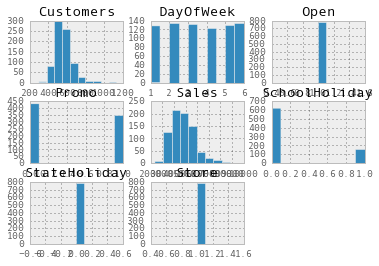

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
store_1.hist()
plt.show()

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2544: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2791: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2544: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2791: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0



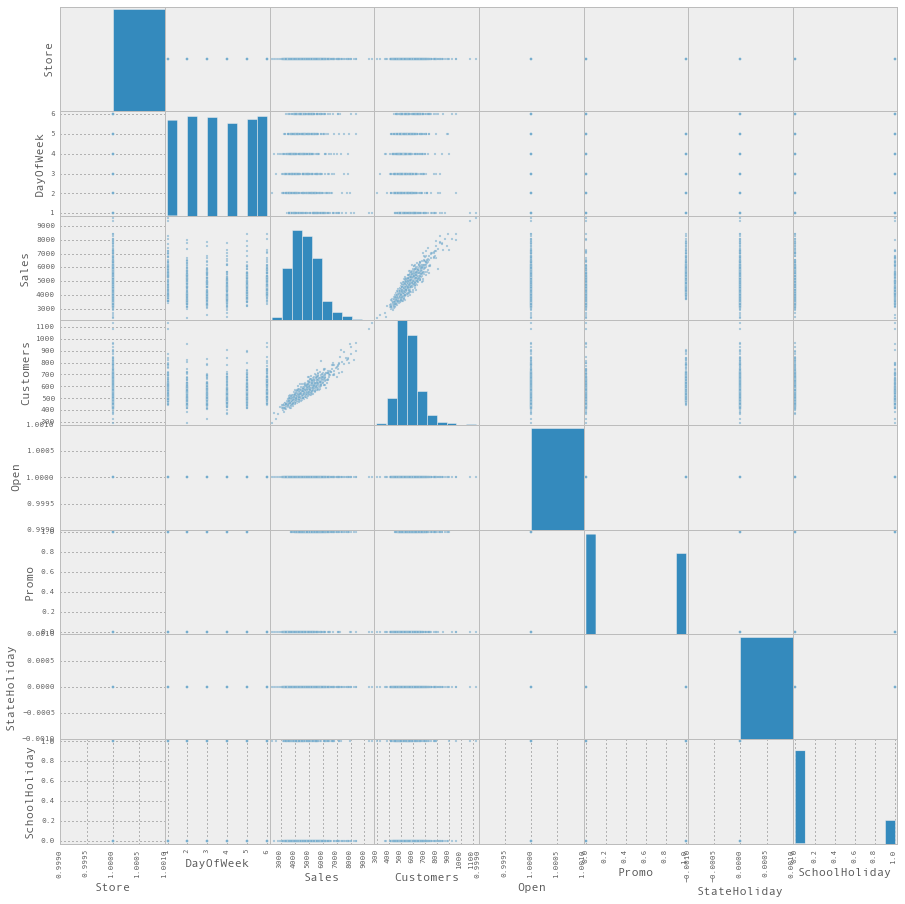

In [15]:
p = scatter_matrix(store_1, figsize=(15, 15))

In [16]:
training_data.drop('Store',axis=1).corr()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
DayOfWeek,1.000000,-0.178753,-0.097266,NaN,-0.289268,NaN,-0.139319
Sales,-0.178753,1.000000,0.823552,NaN,0.368199,NaN,0.038635
Customers,-0.097266,0.823552,1.000000,NaN,0.182859,NaN,0.024915
Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,-0.289268,0.368199,0.182859,NaN,1.000000,NaN,0.028971
StateHoliday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,-0.139319,0.038635,0.024915,NaN,0.028971,NaN,1.000000


In [17]:
store_1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,781,781.000000,781.000000,781.000000,781,781.000000,781,781.000000
mean,1,3.504481,4759.096031,564.049936,1,0.448143,0,0.204866
std,0,1.714656,1012.106393,93.707476,0,0.497622,0,0.403862
min,1,1.000000,2362.000000,298.000000,1,0.000000,0,0.000000
25%,1,2.000000,4000.000000,500.000000,1,0.000000,0,0.000000
50%,1,3.000000,4647.000000,550.000000,1,0.000000,0,0.000000
75%,1,5.000000,5348.000000,612.000000,1,1.000000,0,0.000000
max,1,6.000000,9528.000000,1130.000000,1,1.000000,0,1.000000


In [18]:
store_1['Customers'].autocorr()

0.67112732721931778

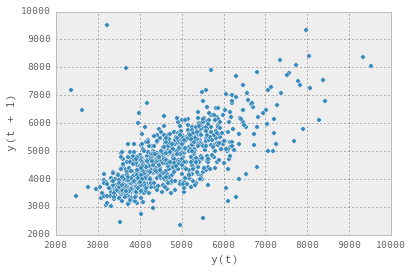

In [19]:
from pandas.tools.plotting import lag_plot
lag_plot(store_1['Sales'])

Trying out the autocorrelation plot to show correlation between lag in sales with itself. High values of correlation indicate that Sales depends on it's past values a lot.

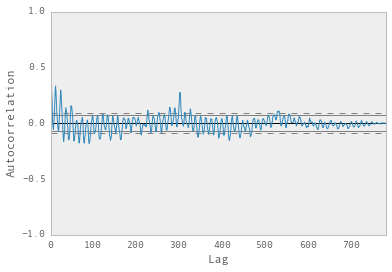

In [20]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(store_1['Sales'])

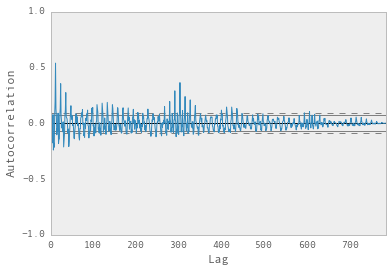

In [21]:
autocorrelation_plot(store_2['Sales'])

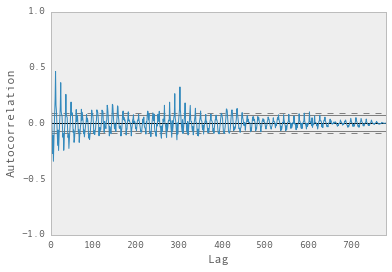

In [22]:
autocorrelation_plot(store_3['Sales'])

Ok let's try out some forecasting methods now

In [23]:
store_1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
6690,1,6,2015-07-25,4364,500,1,0,0,0
7805,1,5,2015-07-24,3706,459,1,0,0,0
8920,1,4,2015-07-23,3769,503,1,0,0,0
10035,1,3,2015-07-22,3464,463,1,0,0,0
11150,1,2,2015-07-21,3558,469,1,0,0,0


In [ ]:
store_1